In [13]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from api_keys import api_key
cities_df = pd.read_csv('cities.csv')


In [14]:
import requests

api_key = "8616d0d0f1867cd8aa88f43c568f655e"
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_data = []

for index, row in cities_df.iterrows():
    city = row['City']
    query_url = f"{url}q={city}&appid={api_key}"
    response = requests.get(query_url).json()

weather_data.append({
    "City": city,
    "Lat": response['coord']['lat'],
    "Lng": response['coord']['lon'],
    "Max Temp": response['main']['temp_max'],
    "Humidity": response['main']['humidity'],
    "Cloudiness": response['clouds']['all'],
    "Wind Speed": response['wind']['speed'],
    "Country": response['sys']['country'],
    "Date": response['dt']
})

weather_df = pd.DataFrame(weather_data)
    

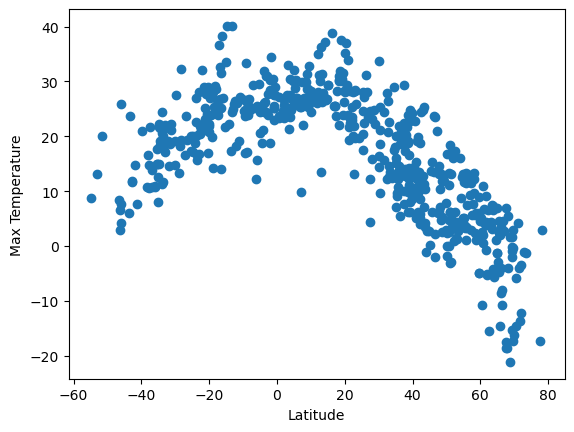

In [16]:
plt.scatter(cities_df['Lat'], cities_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

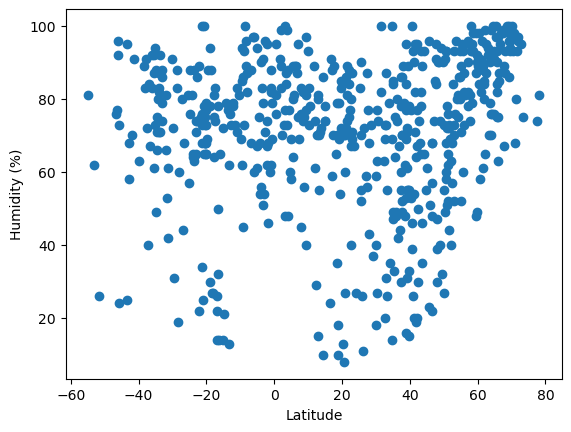

In [17]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

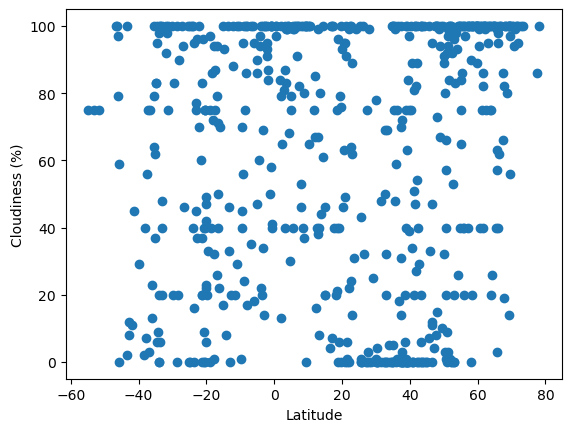

In [18]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

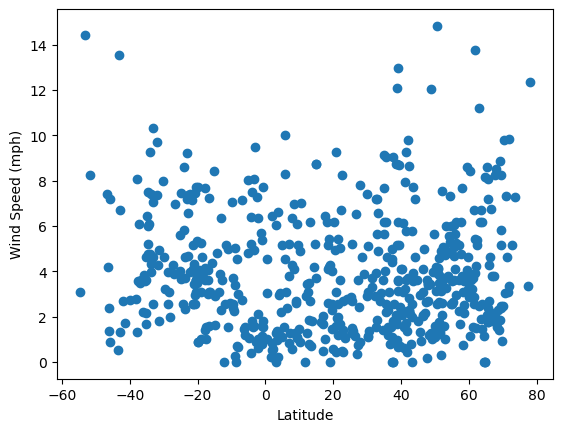

In [19]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [22]:
n_hemisphere = cities_df[cities_df['Lat'] >=0]
s_hemisphere = cities_df[cities_df['Lat'] < 0]

from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, coordinates):
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt. scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show

The r-value is: -0.8462548186825364


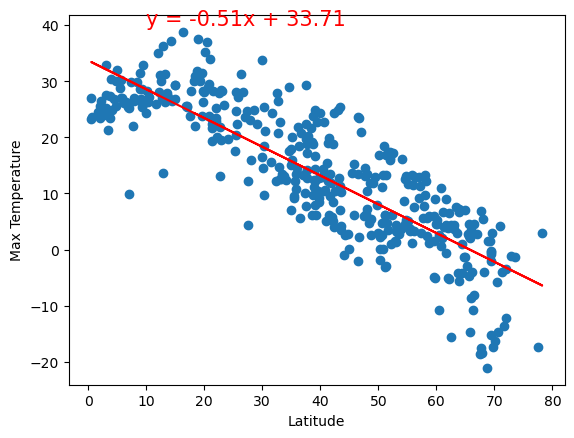

In [31]:
plot_linear_regression(n_hemisphere['Lat'], n_hemisphere['Max Temp'], 'Northern Hemispehre - Temperature vs. Latitude', 'Latitude', 'Max Temperature', (10,40)) 

The r-value is: 0.6419546065421801


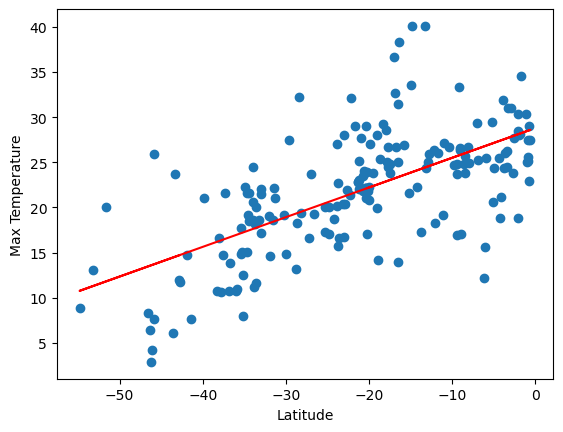

In [32]:
plot_linear_regression(s_hemisphere['Lat'], s_hemisphere['Max Temp'], 'Southern Hemispehre - Temperature vs. Latitude', 'Latitude', 'Max Temperature', (10,40)) 

The r-value is: 0.2385317912939407


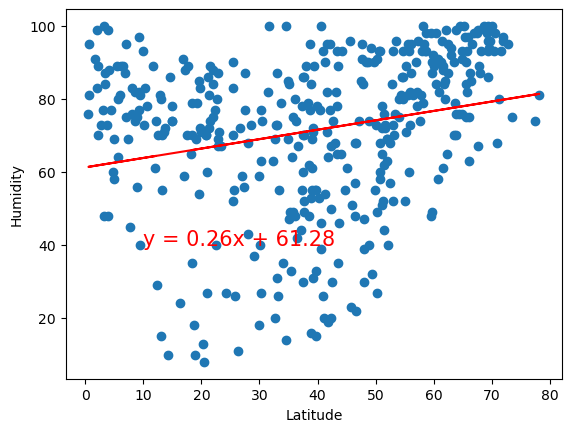

In [33]:
plot_linear_regression(n_hemisphere['Lat'], n_hemisphere['Humidity'], 'Northern Hemispehre - Humidity vs. Latitude', 'Latitude', 'Humidity', (10,40)) 

The r-value is: 0.016759316950056818


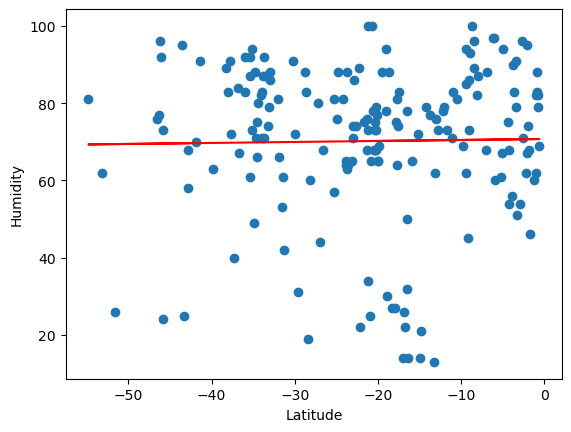

In [34]:
plot_linear_regression(s_hemisphere['Lat'], s_hemisphere['Humidity'], 'Southern Hemispehre - Humidity vs. Latitude', 'Latitude', 'Humidity', (10,40))

The r-value is: 0.155004893876971


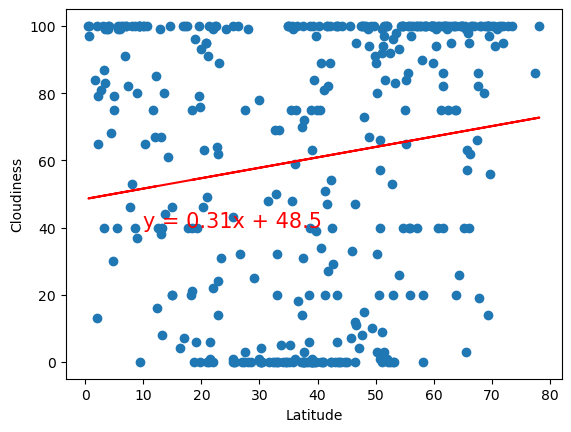

In [35]:
plot_linear_regression(n_hemisphere['Lat'], n_hemisphere['Cloudiness'], 'Northern Hemispehre - Cloudiness vs. Latitude', 'Latitude', 'Cloudiness', (10,40)) 

The r-value is: 0.14341322916643243


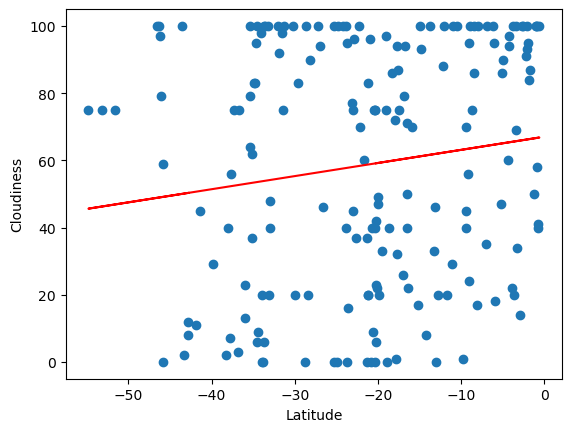

In [28]:
plot_linear_regression(s_hemisphere['Lat'], s_hemisphere['Cloudiness'], 'Southern Hemispehre - Cloudiness vs. Latitude', 'Latitude', 'Cloudiness', (10,40)) 

The r-value is: 0.1743466729090334


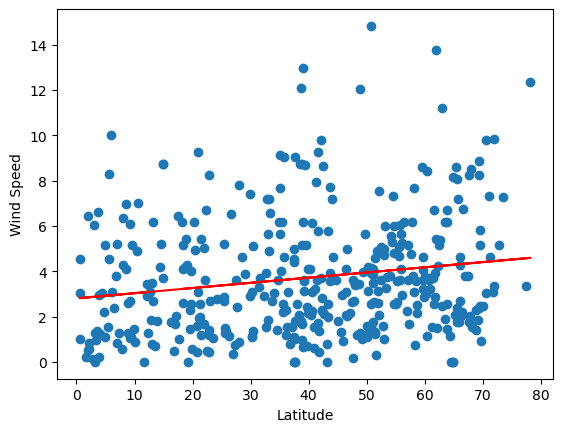

In [29]:
plot_linear_regression(n_hemisphere['Lat'], n_hemisphere['Wind Speed'], 'Northern Hemispehre - Wind Speed vs. Latitude', 'Latitude', 'Wind Speed', (10,40)) 

The r-value is: -0.24947753546264592


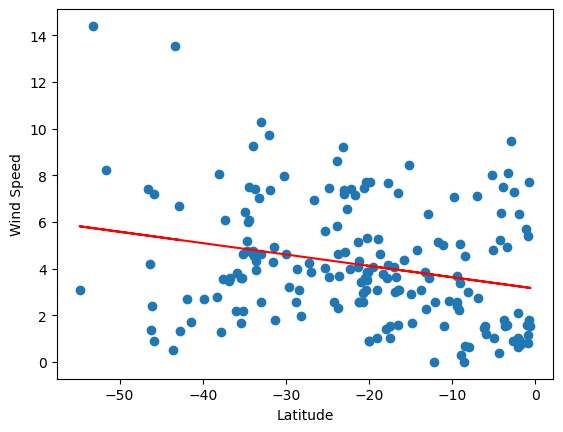

In [30]:
plot_linear_regression(s_hemisphere['Lat'], s_hemisphere['Wind Speed'], 'Southern Hemispehre - Wind Speed vs. Latitude', 'Latitude', 'Wind Speed', (10,40)) 